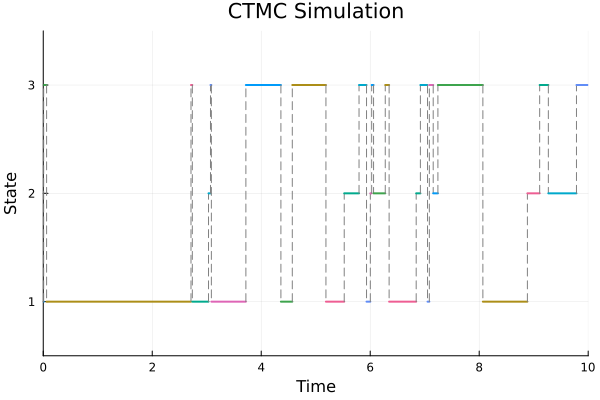

In [81]:
using Distributions
using Plots
using Distributions

function simulate_ctmc(Q::Array{Float64,2}, initial_state::Int, T::Float64)
    num_states = size(Q, 1)
    t = 0.0
    s = initial_state
    times = [t]
    states = [s]
    tolerance = 1e-10

    while t < T
        λ = -Q[s, s]
        if λ < -tolerance
            error("Rate out of current state is negative at state $s.")
        elseif λ == 0
            println("There is an absorbing state at state $s.")
            break
        end

        Δt = rand(Exponential(λ))
        t += Δt
        if t >= T
            break
        end

        rates = copy(Q[s, :])
        rates[s] = 0.0
        total_rate = sum(rates)
        if total_rate <= 0
            error("No transitions available from current state $s.")
        end

        probs = rates / total_rate
        dist = Categorical(probs)
        s = rand(dist)
        push!(times, t)
        push!(states, s)
    end

    if times[end] < T
        push!(times, T)
        push!(states, states[end])
    end

    return times, states
end


# function simulate_ctmc(Q::Array{Float64,2}, initial_state::Int, T::Float64)
#     """
#     Simulates a continuous-time Markov chain (CTMC) over a specified time horizon.

#     Parameters:
#     - Q: Generator matrix (rate matrix) of size (n x n), where n is the number of states.
#          Q[i, j] represents the rate of transitioning from state i to state j.
#     - initial_state: The starting state (integer index from 1 to n).
#     - T: Total simulation time.

#     Returns:
#     - times: A vector of event times when state transitions occur.
#     - states: A vector of states corresponding to each event time.
#     """
#     num_states = size(Q, 1)
#     t = 0.0
#     s = initial_state
#     times = [t]
#     states = [s]
    
#     while t < T
#         # Rate out of current state s
#         λ = -Q[s, s]
#         if λ < 0
#             error("Rate out of current state is negative at state $s.")
#         elseif λ == 0
#             println("Absorbing state reached at state $s.")
#             t = T
#             push!(times, t)
#             push!(states, s)
#             break
#         end
        
#         Δt = rand(Exponential(λ))
#         t += Δt
#         if t >= T
#             break
#         end
        
#         # Transition rates to other states
#         rates = copy(Q[s, :])
#         rates[s] = 0.0  # No self-transition
#         total_rate = sum(rates)
#         if total_rate <= 0
#             error("No transitions available from current state $s.")
#         end
#         probs = rates / total_rate  # Transition probabilities
        
#         # Choose next state based on transition probabilities
#         dist = Categorical(probs)
#         s = rand(dist)
        
#         # Record the time and state
#         push!(times, t)
#         push!(states, s)
#     end
    
#     # Append the final time T to the times vector
#     if times[end] < T
#         push!(times, T)
#         push!(states, states[end])  # State remains the same until T
#     end
    
#     return times, states
# end

# Visualization function
function plot_ctmc(times::Vector{Float64}, states::Vector{Int}, T::Float64)
    plot(
        xlabel="Time", 
        ylabel="State", 
        title="CTMC Simulation",
        yticks=collect(1:maximum(states)),
        xlim=(0, T), 
        ylim=(minimum(states)-0.5, maximum(states)+0.5),
        grid=:both
    )
    
    for i in 1:(length(times)-1)
        plot!([times[i], times[i+1]], [states[i], states[i]], linewidth=2, label=false)
        if i < length(times)-1
            plot!([times[i+1], times[i+1]], [states[i], states[i+1]], linestyle=:dash, color=:gray, label=false)
        end
    end

    display(current())
end

# function plot_ctmc(times::Vector{Float64}, states::Vector{Int}, T::Float64)
#     """
#     Plots the state transitions of a CTMC over time.

#     Parameters:
#     - times: A vector of event times when state transitions occur.
#     - states: A vector of states corresponding to each event time.
#     - T: Total simulation time.
#     """
#     # Create a step plot
#     plot()
#     for i in 1:(length(times)-1)
#         plot!([times[i], times[i+1]], [states[i], states[i]], linewidth=2, label=false)
#         # Add vertical lines to indicate state changes
#         if i < length(times)-1
#             plot!([times[i+1], times[i+1]], [states[i], states[i+1]], linestyle=:dash, color=:gray, label=false)
#         end
#     end
#     # Set plot attributes
#     plot!(
#         xlabel="Time",
#         ylabel="State",
#         title="CTMC Simulation",
#         yticks=collect(1:maximum(states)),
#         xlim=(0, T),
#         ylim=(minimum(states)-0.5, maximum(states)+0.5),
#         grid=:both
#     )
#     display(current())
# end

# Example usage:

# Define the generator matrix Q
Q = [-0.5  0.3  0.2;
      0.1 -0.4  0.3;
      0.2  0.1 -0.3]

# Set initial state and total simulation time
initial_state = 1
T = 10.0

# Simulate the CTMC
times, states = simulate_ctmc(Q, initial_state, T)

# Call the plotting function
plot_ctmc(times, states, T)


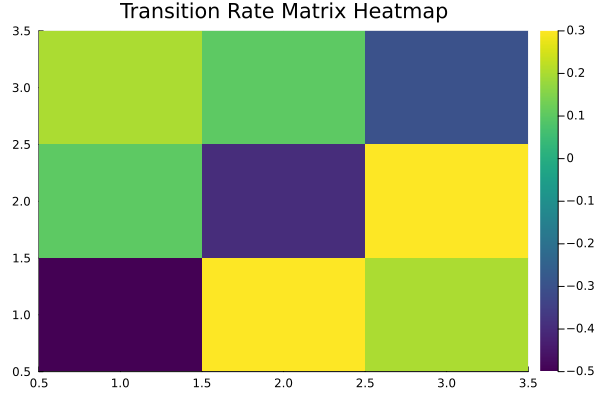

In [46]:
heatmap(Q, c=:viridis, title="Transition Rate Matrix Heatmap")

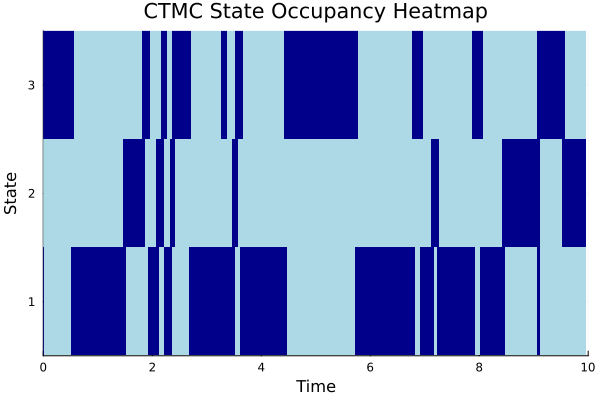

In [84]:
using Distributions
using Plots
using Distributions

function simulate_ctmc(Q::Array{Float64,2}, initial_state::Int, T::Float64)
    """
    Simulates a continuous-time Markov chain (CTMC).

    Parameters:
    - Q: Infinitesimal generator matrix (n x n matrix)
    - initial_state: Initial state (integer between 1 and n)
    - T: Total simulation time (positive float)

    Returns:
    - times: Vector of event times
    - states: Vector of states at each event time
    """
    num_states = size(Q, 1)
    t = 0.0
    s = initial_state
    times = [t]
    states = [s]

    while t < T
        # Rate out of current state s
        λ = -Q[s, s]
        if λ < 0
            error("Rate out of current state must be non-negative at state $s.")
        elseif λ == 0
            println("There is an absorbing state at state $s.")
            # Process remains in the current state indefinitely
            # Extend the timeline to T and break the loop
            if times[end] < T
                push!(times, T)
                push!(states, s)  # State remains the same until T
            end
            break
        end

        # Sample time to next event
        Δt = rand(Exponential(λ))
        t += Δt
        if t >= T
            break
        end

        # Transition rates to other states
        rates = copy(Q[s, :])
        rates[s] = 0.0  # No self-transition
        total_rate = sum(rates)
        if total_rate <= 0
            error("No transitions available from current state $s.")
        end
        probs = rates / total_rate  # Transition probabilities

        # Choose next state based on transition probabilities
        dist = Categorical(probs)
        s = rand(dist)

        # Record the time and state
        push!(times, t)
        push!(states, s)
    end

    # Append the final time T to the times vector if not already included
    if times[end] < T
        push!(times, T)
        push!(states, states[end])  # State remains the same until T
    end

    return times, states
end

# function simulate_ctmc(Q::Array{Float64,2}, initial_state::Int, T::Float64)
#     """
#     Simulates a continuous-time Markov chain (CTMC) over a specified time horizon.

#     Parameters:
#     - Q: Generator matrix (rate matrix) of size (n x n), where n is the number of states.
#          Q[i, j] represents the rate of transitioning from state i to state j.
#     - initial_state: The starting state (integer index from 1 to n).
#     - T: Total simulation time.|

#     Returns:
#     - times: A vector of event times when state transitions occur.
#     - states: A vector of states corresponding to each event time.
#     """
#     num_states = size(Q, 1)
#     t = 0.0
#     s = initial_state
#     times = [t]
#     states = [s]
    
#     while t < T
#         # Rate out of current state s
#         λ = -Q[s, s]
#         if λ <= 0
#             error("Rate out of current state is non-positive at state $s.")
#         end
        
#         # Sample time to next event
#         Δt = rand(Exponential(λ))
#         t += Δt
#         if t >= T
#             break
#         end
        
#         # Transition rates to other states
#         rates = copy(Q[s, :])
#         rates[s] = 0.0  # No self-transition
#         total_rate = sum(rates)
#         if total_rate <= 0
#             error("No transitions available from current state $s.")
#         end
#         probs = rates / total_rate  # Transition probabilities
        
#         # Choose next state based on transition probabilities
#         dist = Categorical(probs)
#         s = rand(dist)
        
#         # Record the time and state
#         push!(times, t)
#         push!(states, s)
#     end
    
#     # Append the final time T to the times vector
#     if times[end] < T
#         push!(times, T)
#         push!(states, states[end])  # State remains the same until T
#     end
    
#     return times, states
# end

# Visualization function for heatmap
function plot_ctmc_heatmap(times::Vector{Float64}, states::Vector{Int}, T::Float64; num_bins::Int=100)
    """
    Plots a heatmap of the CTMC state occupancy over time.

    Parameters:
    - times: A vector of event times when state transitions occur.
    - states: A vector of states corresponding to each event time.
    - T: Total simulation time.
    - num_bins: Number of time bins to divide the simulation time into (default: 100).
    """
    # Create time bins
    time_bins = range(0, T, length=num_bins+1)
    dt = time_bins[2] - time_bins[1]  # Time bin width

    # Number of states
    num_states = maximum(states)
    
    # Initialize occupancy matrix
    occupancy = zeros(Int, num_states, num_bins)
    
    # Assign states to time bins
    for i in 1:length(times)-1
        start_time = times[i]
        end_time = times[i+1]
        state = states[i]
        # Find the bins that correspond to the interval [start_time, end_time)
        start_bin = max(1, floor(Int, (start_time / T) * num_bins) + 1)
        end_bin = min(num_bins, ceil(Int, (end_time / T) * num_bins))
        for bin in start_bin:end_bin
            # Assign occupancy to the corresponding state and time bin
            occupancy[state, bin] = 1
        end
    end
    
    # Create heatmap
    heatmap(
        time_bins[1:end-1],                          # Time bins
        collect(1:num_states),                       # States
        occupancy,                                   # Occupancy matrix
        xlabel="Time",
        ylabel="State",
        title="CTMC State Occupancy Heatmap",
        aspect_ratio=:auto,
        xlims=(0, T),
        ylims=(0.5, num_states+0.5),
        yticks=collect(1:num_states),
        colorbar=false,
        c=:blues,
        legend=true
    )
end

# Example usage:

# Define the generator matrix Q
Q = [-0.5  0.3  0.2;
      0.1 -0.4  0.3;
      0.2  0.1 -0.3]

# Set initial state and total simulation time
initial_state = 1
T = 10.0

# Simulate the CTMC
times, states = simulate_ctmc(Q, initial_state, T)

# Call the plotting function
plot_ctmc_heatmap(times, states, T, num_bins=200)


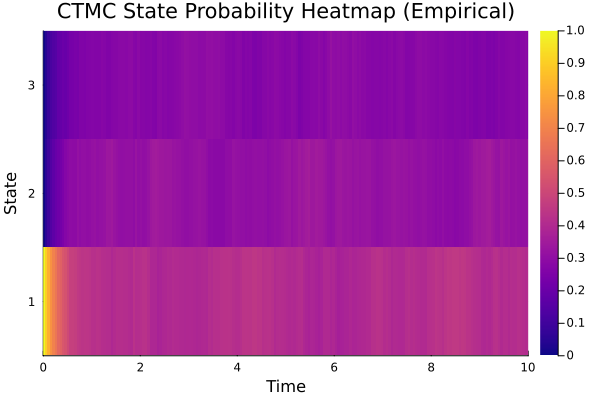

In [90]:
using Distributions
using Plots

function simulate_ctmc(Q::Array{Float64,2}, initial_state::Int, T::Float64)
    """
    Simulates a single path of a continuous-time Markov chain (CTMC) over a specified time horizon.

    Parameters:
    - Q: Generator matrix (rate matrix) of size (n x n), where n is the number of states.
    - initial_state: The starting state (integer index from 1 to n).
    - T: Total simulation time.

    Returns:
    - times: A vector of event times when state transitions occur.
    - states: A vector of states corresponding to each event time.
    """
    num_states = size(Q, 1)
    t = 0.0
    s = initial_state
    times = [t]
    states = [s]
    
    while t < T
        # Rate out of current state s
        λ = -Q[s, s]
        if λ <= 0
            error("Rate out of current state is non-positive at state $s.")
        end
        
        # Sample time to next event
        Δt = rand(Exponential(λ))
        t += Δt
        if t >= T
            break
        end
        
        # Transition rates to other states
        rates = copy(Q[s, :])
        rates[s] = 0.0  # No self-transition
        total_rate = sum(rates)
        probs = rates / total_rate  # Transition probabilities
        
        # Choose next state based on transition probabilities
        dist = Categorical(probs)
        s = rand(dist)
        
        # Record the time and state
        push!(times, t)
        push!(states, s)
    end
    
    # Append the final time T to the times vector
    if times[end] < T
        push!(times, T)
        push!(states, states[end])  # State remains the same until T
    end
    
    return times, states
end

function simulate_multiple_ctmc(Q::Array{Float64,2}, initial_state::Int, T::Float64, num_paths::Int, num_time_points::Int)
    """
    Simulates multiple CTMC paths and computes empirical state probabilities over time.

    Parameters:
    - Q: Generator matrix (n x n).
    - initial_state: Starting state.
    - T: Total simulation time.
    - num_paths: Number of simulation paths.
    - num_time_points: Number of time points to evaluate probabilities.

    Returns:
    - time_points: A vector of time points.
    - state_probs: A matrix of size (num_states x num_time_points) with state probabilities.
    """
    num_states = size(Q, 1)
    time_points = range(0, T, length=num_time_points)
    dt = time_points[2] - time_points[1]
    state_counts = zeros(Float64, num_states, num_time_points)

    for path in 1:num_paths
        times, states = simulate_ctmc(Q, initial_state, T)
        # Assign states to time points
        idx = 1
        for t_idx in 1:num_time_points
            t = time_points[t_idx]
            while idx < length(times) && times[idx+1] <= t
                idx += 1
            end
            state = states[idx]
            state_counts[state, t_idx] += 1
        end
    end

    # Calculate empirical probabilities
    state_probs = state_counts / num_paths

    return time_points, state_probs
end

# Visualization function
function plot_ctmc_heatmap_2(time_points::AbstractVector{Float64}, state_probs::Array{Float64,2})
    """
    Plots a heatmap of the empirical state probabilities over time.

    Parameters:
    - time_points: A vector of time points.
    - state_probs: A matrix of state probabilities (num_states x num_time_points).
    """
    num_states = size(state_probs, 1)
    heatmap(
        time_points,
        collect(1:num_states),
        state_probs,
        xlabel="Time",
        ylabel="State",
        title="CTMC State Probability Heatmap (Empirical)",
        aspect_ratio=:auto,
        xlims=(time_points[1], time_points[end]),
        ylims=(0.5, num_states+0.5),
        yticks=collect(1:num_states),
        colorbar=true,
        c=:plasma,
        clim=(0,1),
        legend=true
    )
end

# Example usage:

# Define the generator matrix Q
Q = [-0.5  0.3  0.2;
      0.1 -0.4  0.3;
      0.2  0.1 -0.3]

# Set initial state and total simulation time
initial_state = 1
T = 10.0

# Simulation parameters
num_paths = 1000         # Number of simulation paths
num_time_points = 200    # Number of time points to evaluate probabilities

# Simulate multiple CTMC paths
time_points, state_probs = simulate_multiple_ctmc(Q, initial_state, T, num_paths, num_time_points)

# Plot the heatmap
plot_ctmc_heatmap_2(collect(time_points), state_probs)


In [69]:
import Pkg; Pkg.add("GraphRecipes")

   Resolving package versions...
   Installed EarCut_jll ───── v2.2.4+0
   Installed Extents ──────── v0.1.4
   Installed NetworkLayout ── v0.4.7
   Installed GeoFormatTypes ─ v0.4.2
   Installed GeometryBasics ─ v0.4.11
   Installed StructArrays ─── v0.6.18
   Installed GraphRecipes ─── v0.5.13
   Installed GeometryTypes ── v0.8.5
   Installed GeoInterface ─── v1.3.7
    Updating `~/.julia/environments/v1.10/Project.toml`
  [bd48cda9] + GraphRecipes v0.5.13
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [411431e0] + Extents v0.1.4
  [68eda718] + GeoFormatTypes v0.4.2
  [cf35fbd7] + GeoInterface v1.3.7
  [5c1252a2] + GeometryBasics v0.4.11
  [4d00f742] + GeometryTypes v0.8.5
  [bd48cda9] + GraphRecipes v0.5.13
  [46757867] + NetworkLayout v0.4.7
  [09ab397b] + StructArrays v0.6.18
  [5ae413db] + EarCut_jll v2.2.4+0
Precompiling project...
  ✓ GeoFormatTypes
  ✓ Extents
  ✓ EarCut_jll
  ✓ StructArrays
  ✓ Accessors → AccessorsStructArraysExt
  ✓ GeometryTypes
  ✓ GeoInterfac

In [74]:
# # 1. Graph Layout with `GraphPlot.jl`
# using LightGraphs
# using GraphPlot
# using GraphRecipes
# using Plots

# # Assuming Q is the transition rate matrix
# Q = rand(0:5, 30, 30)  # Define your Q matrix
# n = size(Q, 1)
# g = SimpleDiGraph(n)

# for i in 1:n, j in 1:n
#     if Q[i, j] > 0 && i != j
#         add_edge!(g, i, j)
#     end
# end

# # Visualize CTMC with transition rates as edge weights
# weights = [Q[i, j] for i in 1:n, j in 1:n if Q[i, j] > 0 && i != j]
# gplot(g, layout=spring_layout, edgestrokec="black", edgelinewidth=weights, arrowlengthfrac=0.05)

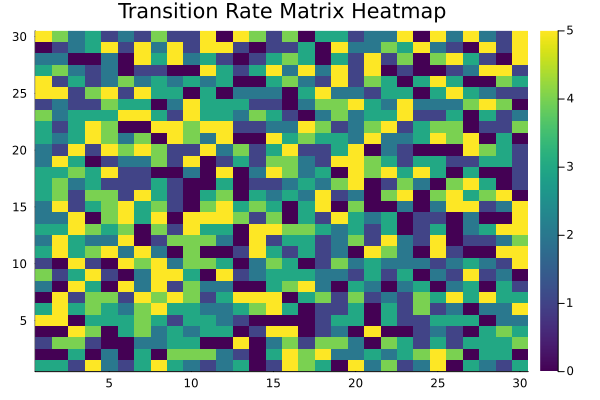

In [75]:

# 2. Matrix Heatmap Representation
using Plots

Q = rand(0:5, 30, 30)  # Define your Q matrix

heatmap(Q, c=:viridis, title="Transition Rate Matrix Heatmap")


In [66]:

# # 3. Hierarchical Clustering or Graph Simplification
# using LightGraphs
# using Clustering
# using Distances
# using GraphPlot

# Q = rand(0:5, 30, 30)  # Define your Q matrix

# # Compute distances between rows (or columns) of Q to cluster states
# dist_matrix = pairwise(Euclidean(), Q, dims=1)
# k = 10  # Choose the number of clusters

# clusters = kmeans(dist_matrix, k)

# # Create a simplified graph based on the clusters
# reduced_graph = SimpleDiGraph(k)
# # Logic to add edges based on cluster relationships would go here
# # (for demonstration purposes, we'll connect clusters arbitrarily)
# for i in 1:k-1
#     add_edge!(reduced_graph, i, i+1)
# end

# gplot(reduced_graph, layout=circular_layout)


In [101]:
using JuMP, Ipopt

# Function to solve the inner problem given values of x and y
function solve_inner_problem(x_val::Real, y_val::Real)
    model_inner = Model(Ipopt.Optimizer)

    # Variables for the inner problem
    @variable(model_inner, z >= 0)

    # Objective function of the inner problem (depends on outer variables)
    @objective(model_inner, Min, (x_val - z)^2 + (y_val - z)^2)

    # Constraints for the inner problem
    @constraint(model_inner, z >= 1)

    optimize!(model_inner)

    return value(z)  # Return the optimal value of z from the inner problem
end

# Outer problem
model_outer = Model(Ipopt.Optimizer)

# Variables for the outer problem
@variable(model_outer, x >= 0)
@variable(model_outer, y >= 0)

# Constraints of the outer problem
@constraint(model_outer, x + y <= 10)

# Placeholder for the inner problem solution (initial guess)
global inner_opt_value = 0.0

# Function to update the outer objective function after solving the inner problem
function update_objective!(model_outer, x_val, y_val)
    global inner_opt_value = solve_inner_problem(x_val, y_val)
    
    # Rebuild the objective with the updated inner problem result
    @objective(model_outer, Max, 3 * x + 2 * y + inner_opt_value)
end

# Solve the outer problem iteratively
for i in 1:10  # Iteration loop, 10 steps for example
    println("Iteration $i: Solving inner problem for x = $(value(x)) and y = $(value(y))")
    
    # Update the outer objective function based on the inner problem solution
    update_objective!(model_outer, value(x), value(y))
    
    # Re-solve the outer problem with the updated objective
    optimize!(model_outer)
    
    # After solving the problem, you can query the solution values
    println("Optimal x: ", value(x))
    println("Optimal y: ", value(y))
    println("Inner optimization result (z): ", inner_opt_value)
end


┌ Warning: The model has been modified since the last call to `optimize!` (or `optimize!` has not been called yet). If you are iteratively querying solution information and modifying a model, query all the results first, then modify the model.
└ @ JuMP ~/.julia/packages/JuMP/6RAQ9/src/optimizer_interface.jl:1085


LoadError: OptimizeNotCalled()

In [94]:
import Pkg; Pkg.add("MathOptInterface")

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [b8f27783] + MathOptInterface v1.31.2
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
Precompiling project...
  ✓ StructArrays → StructArraysGPUArraysCoreExt
  1 dependency successfully precompiled in 2 seconds. 443 already precompiled. 33 skipped during auto due to previous errors.
